<a href="https://colab.research.google.com/github/GunjanKishore21/IBM-HR-Employee-Attrition-/blob/main/Final_IBM_HR_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score




##***1. Loading*** ***Dataset***


In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")



In [ ]:
#First View
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##***2.Exploratory Data Analysis***



###Dataset shape

In [ ]:
df.shape

(1470, 35)

###Dataset Infomation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

###Checking Missing values

In [ ]:
df.isnull().sum().sum()

0

###Checking Duplicate Values

In [ ]:
df.duplicated().sum()

0

###Descriptive analysis of dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


###Dataset Columns

In [ ]:
#Columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Checking Unique values in variables


In [ ]:
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


##Inference


*   The Dataset contains 1470 rows with 35 columns.
*   The data is cleaned as there is no NaN,duplicates or any incorrect datatype.



*   Over18, StandardHours, EmployeeCount have only 1 unique value that convey that it is same for all, so there is no need of these column for our analysis.


*   EmployeeNumber Represent unique value of each employee.

*   So we can drop these attribute and store Employeenumber in different variable as it will helpful in futher assign attrition probabilty.





In [ ]:
Employee_id=df["EmployeeNumber"]

###Droping attributes

In [ ]:
df.drop(["Over18","StandardHours","EmployeeCount","EmployeeNumber"],axis=1,inplace=True)

In [ ]:
df.shape

(1470, 31)

In [ ]:
# Categorical Columns in dataset
df_categorical=df.select_dtypes(include="object").columns
print(df_categorical)
print("-"*75)
print("Number of Categorical Columns=",len(df_categorical))


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
---------------------------------------------------------------------------
Number of Categorical Columns= 8


In [ ]:
#Numerical Columns in Dataset
df_numerical=df.select_dtypes(include="int").columns
print(df_numerical)
print("-"*75)
print("Number of Numerical Columns=",len(df_numerical))


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
---------------------------------------------------------------------------
Number of Numerical Columns= 23


##Visualizing the features

###Chart -1 (Distribution plot of numerical variables)

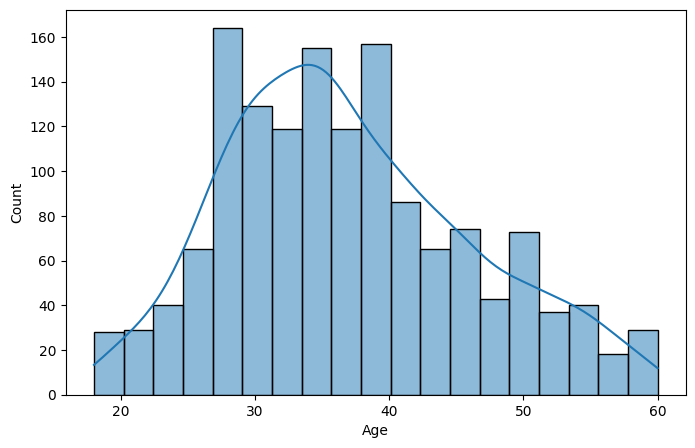

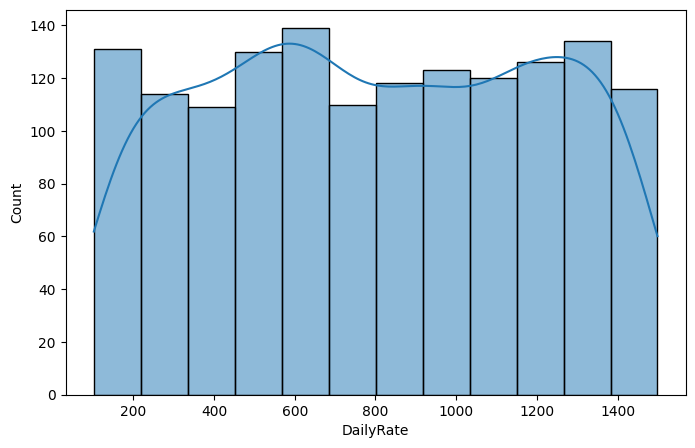

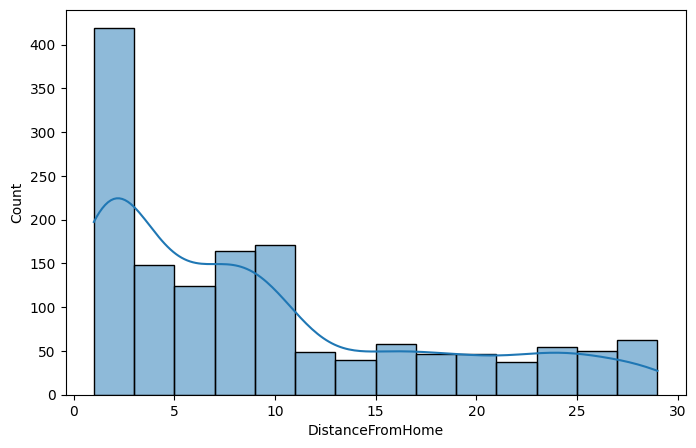

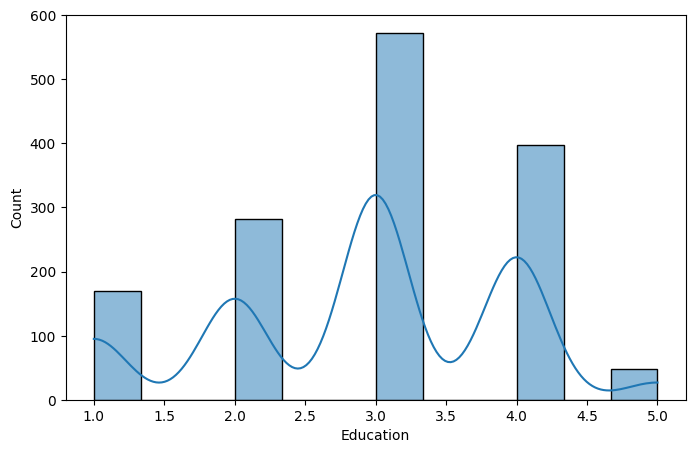

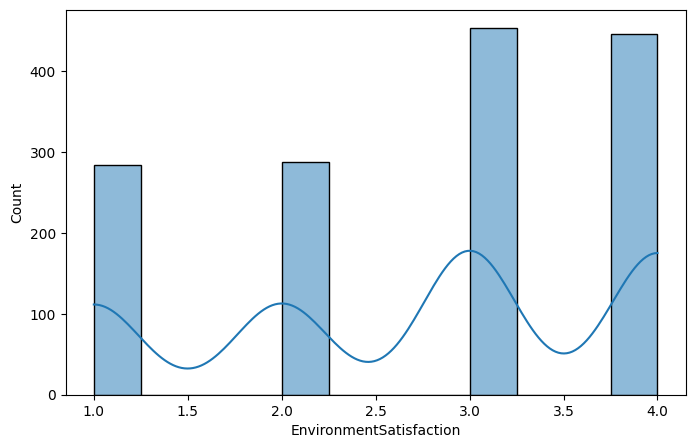

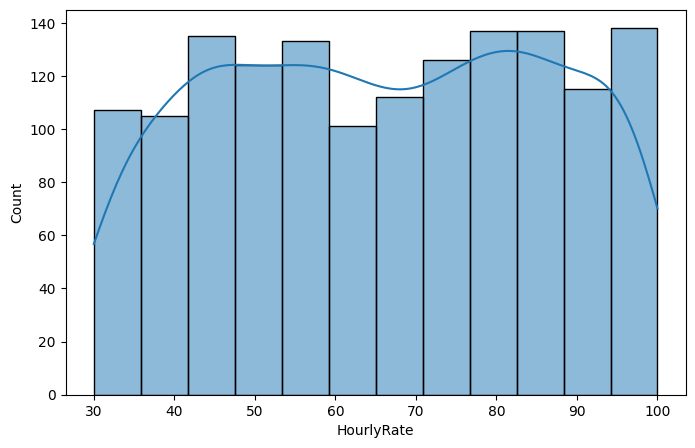

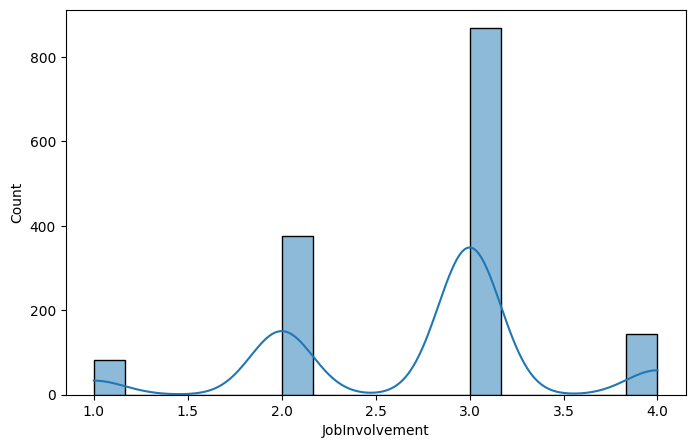

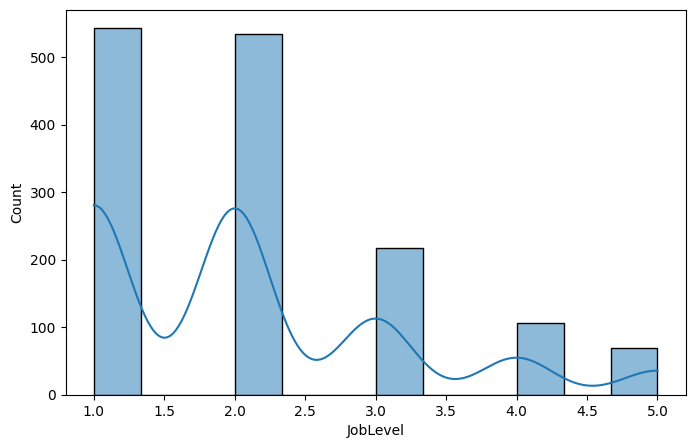

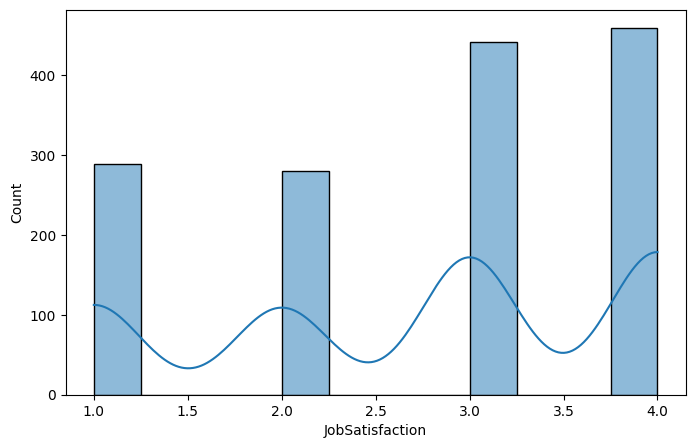

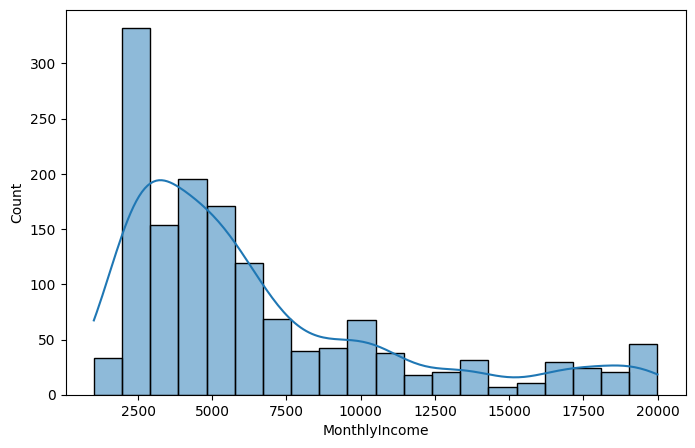

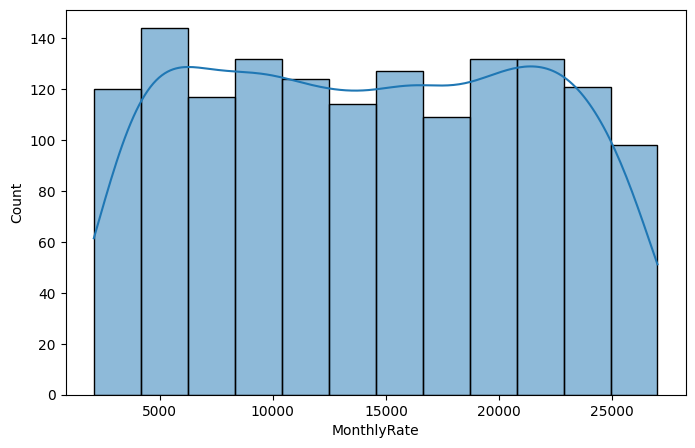

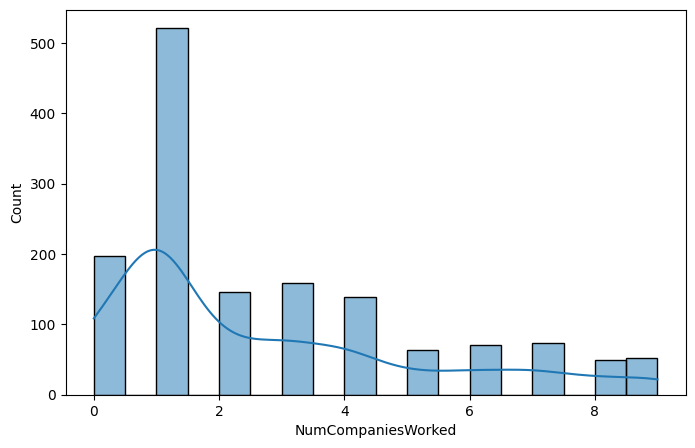

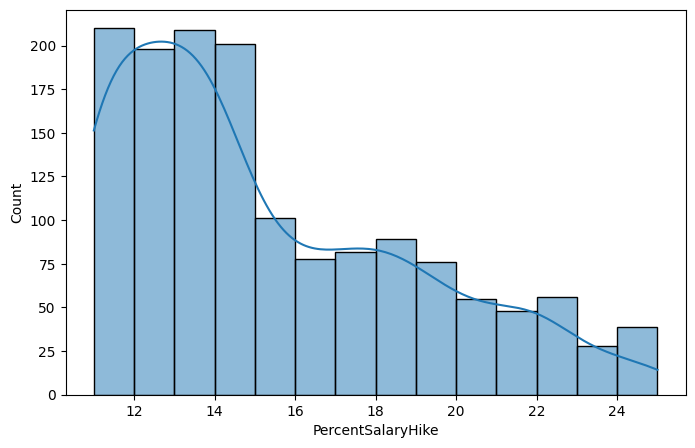

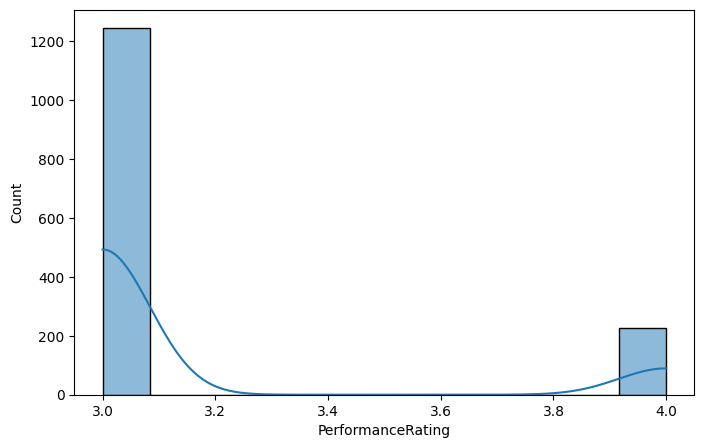

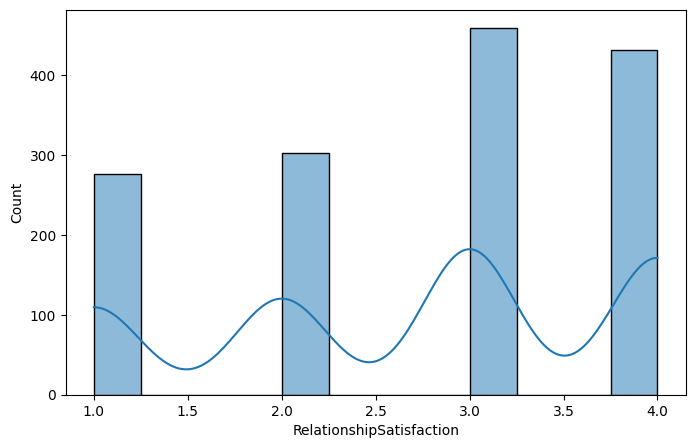

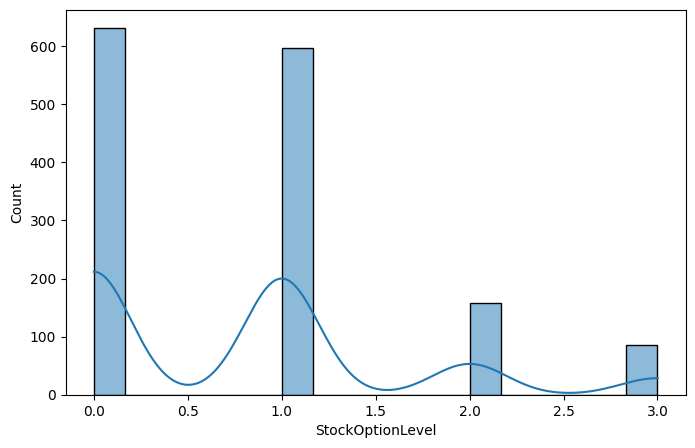

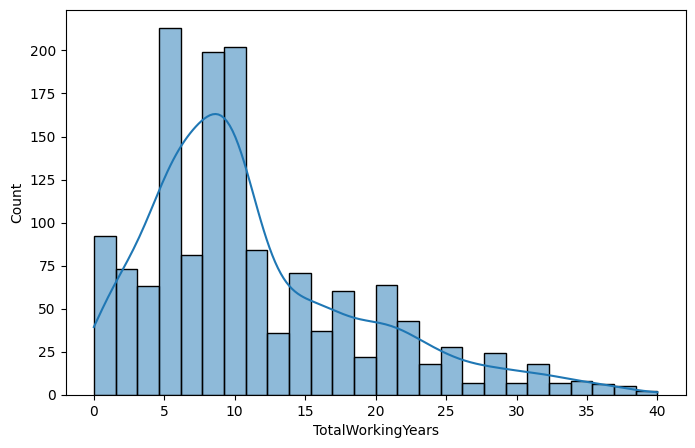

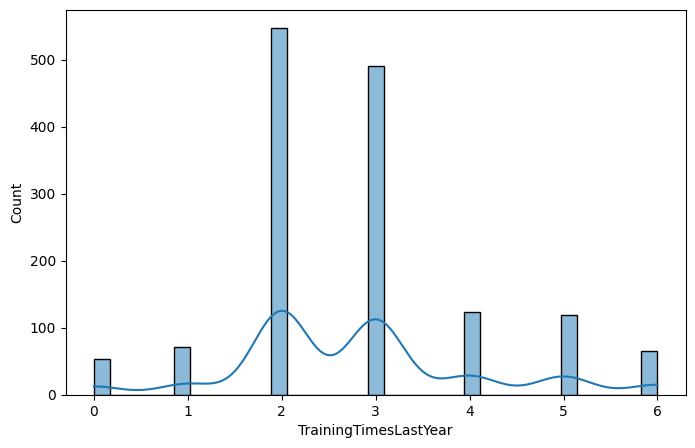

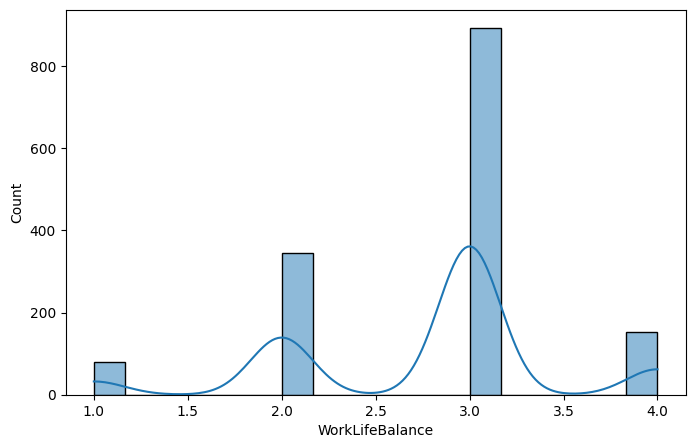

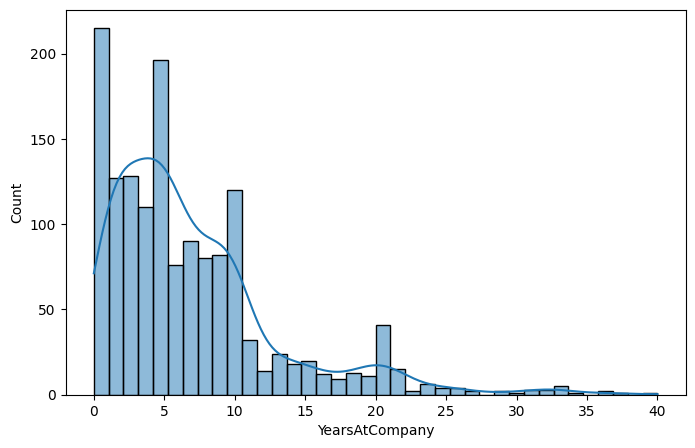

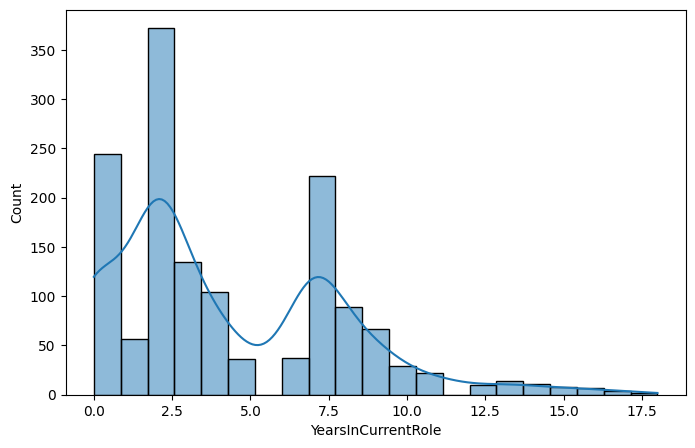

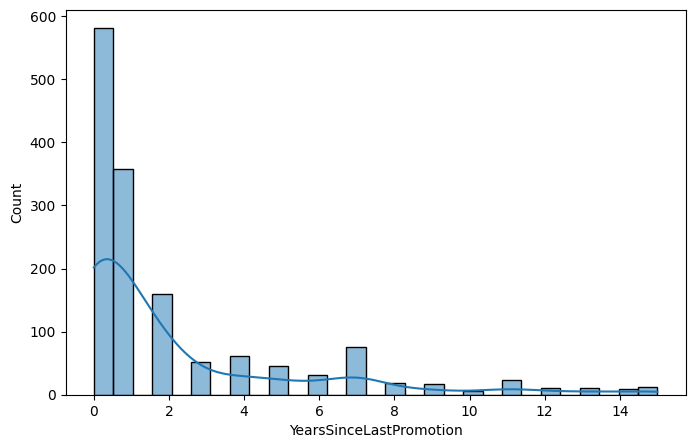

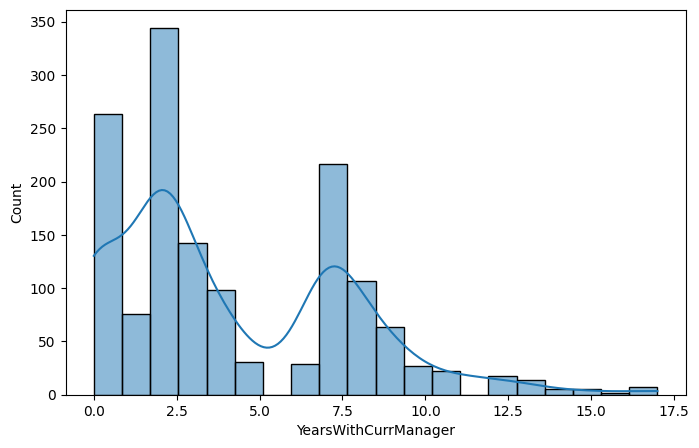

In [ ]:
#Creating Distribution plot across numerical features
for num_col in df_numerical:
  plt.figure(figsize=(8,5))
  sns.histplot(data=df,x=num_col,kde=True)



###Chart-2 Correlation Matrix(Heatmap)

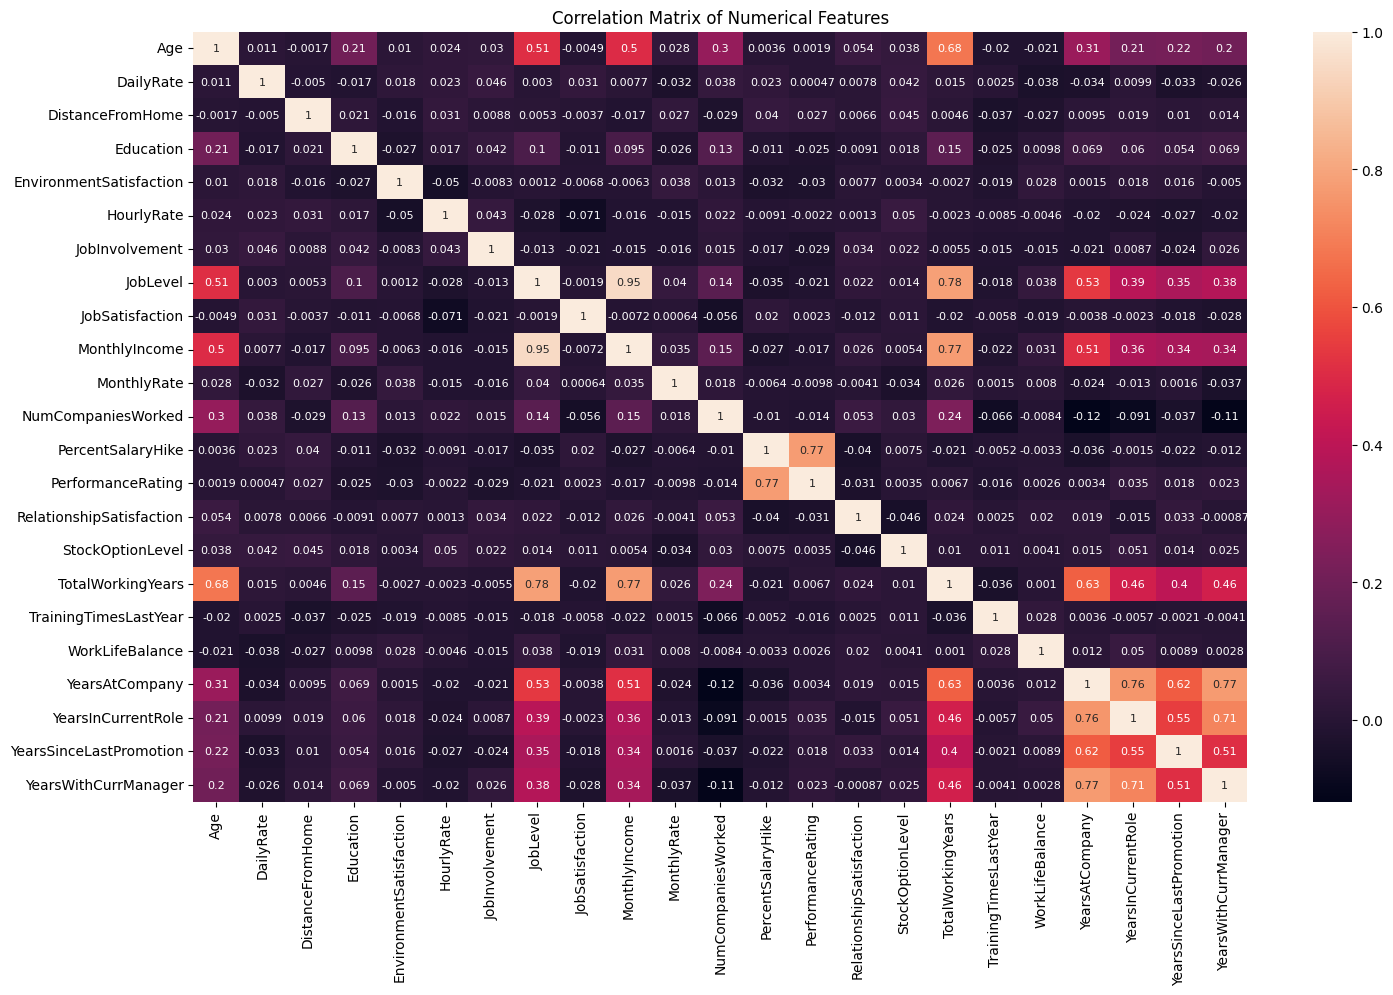

In [ ]:
plt.figure(figsize=(17, 10))
sns.heatmap(df[df_numerical].corr(), annot=True, annot_kws={"size": 8})
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [ ]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if  x== 'Yes' else 0)


##Chart-3 Categorical Feature Vs Attrition

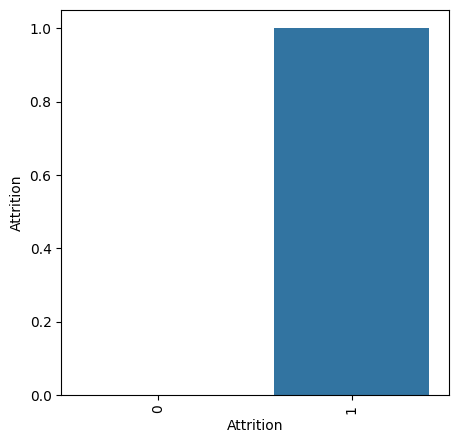

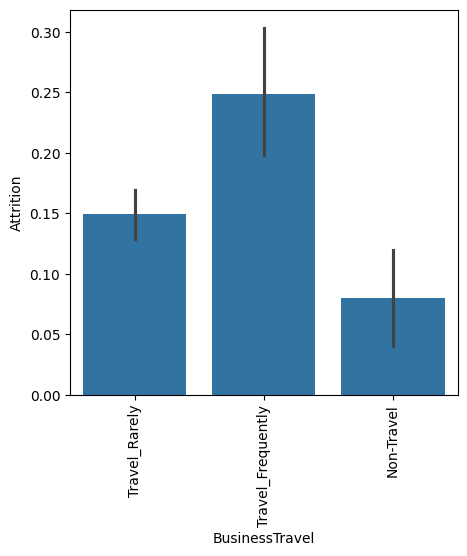

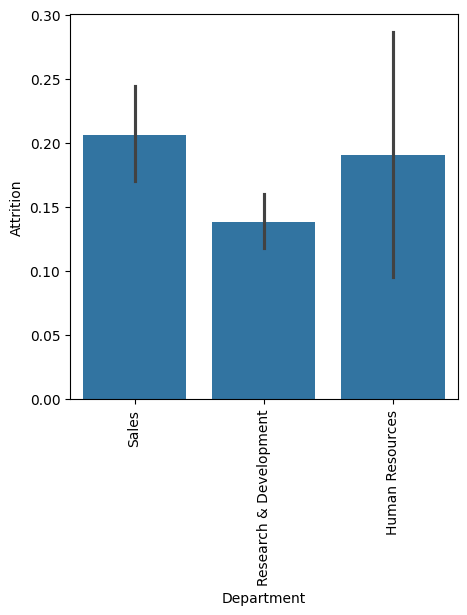

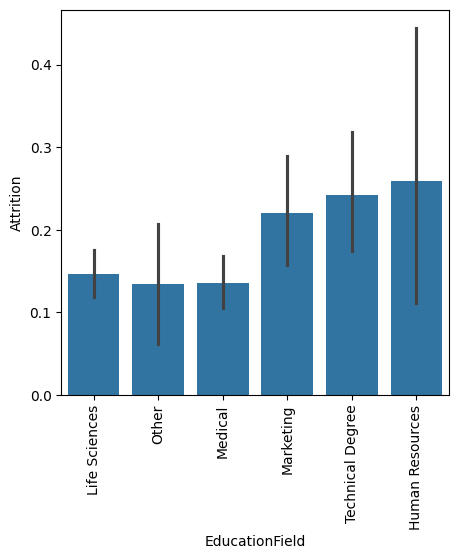

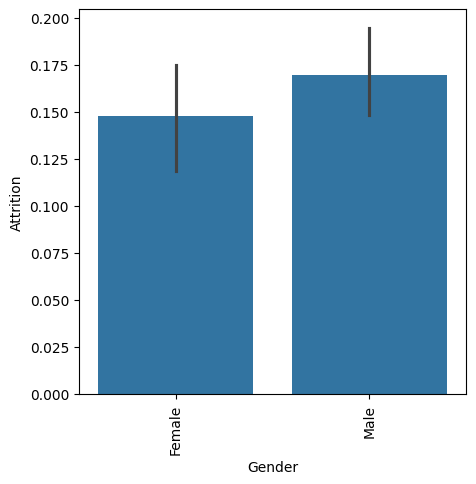

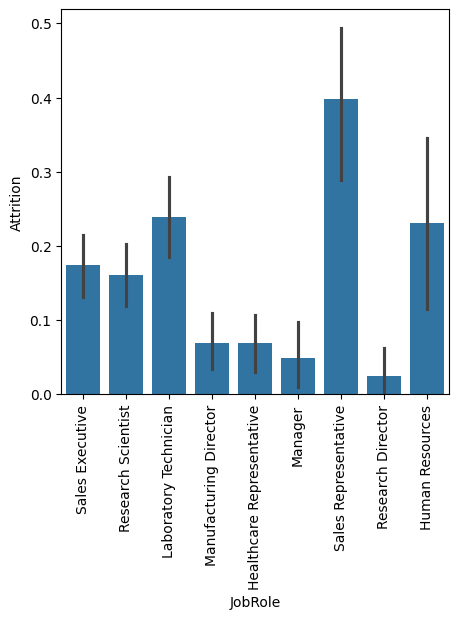

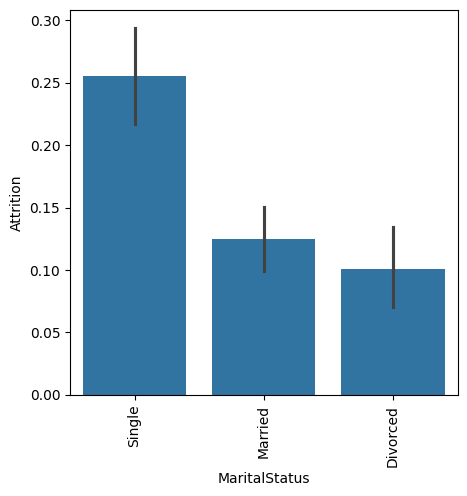

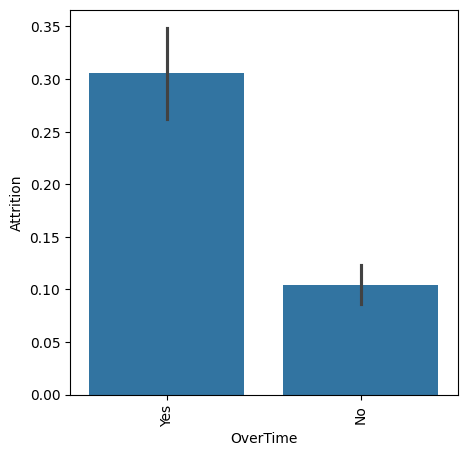

In [ ]:
for col in df_categorical:
  plt.figure(figsize=(5,5))
  sns.barplot(data=df,x=col,y="Attrition")
  plt.xlabel(col)
  plt.ylabel("Attrition")
  plt.xticks(rotation=90)
  plt.show()

##Inference

*  By Visualizing the dataset we need to encode the dataset as it contains categorical features.
*  From the above plots we came to know that some of the columns are skewed.
In order to remove the skewness, we need to scale the data.


*  Also Need to Find out the imbalance in the variable.






#***3.Data Preprocessing***

##Encoding

In [ ]:
#Encoding
#df['Attrition'] = df['Attrition'].apply(lambda x: 1 if  x== 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if  x== 'Male' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if  x== 'Yes' else 0)

In [ ]:
#LabelEncoding
le = LabelEncoder()
columns_to_encode = ["BusinessTravel", "EducationField", "Department", "JobRole", "MaritalStatus"]
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
#Checking Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [ ]:
df.shape

(1470, 31)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


##Handling Imbalance Dataset

In [ ]:
new_df=df.copy()

In [ ]:
new_df.shape

(1470, 31)

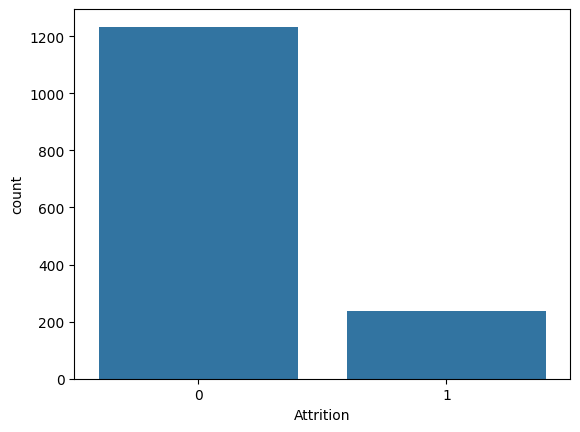

In [ ]:
sns.countplot(data=new_df,x="Attrition")
plt.show()

In [ ]:
X = new_df.drop('Attrition', axis=1)
Y = new_df['Attrition']

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, Y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Attrition'] = y_resampled

new_df = df_resampled

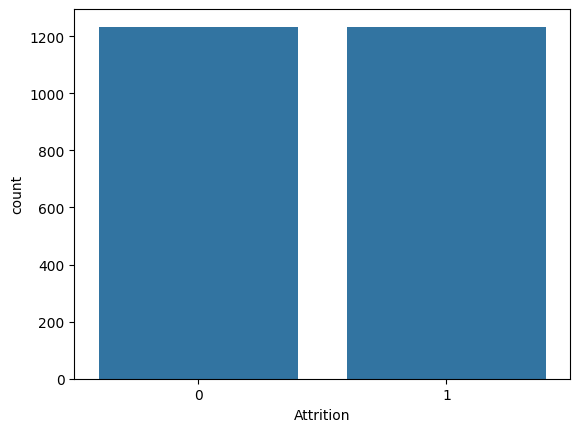

In [ ]:
sns.countplot(data=new_df,x="Attrition")
plt.show()

In [ ]:
new_df.shape

(2466, 31)

In [ ]:
df.shape

(1470, 31)

##Scaling the Numerical Variables

In [ ]:
new_df=df.copy()

In [ ]:
new_df.shape

(1470, 31)

In [ ]:
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
skewed_columns=['DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']


In [ ]:
scaler = StandardScaler()
new_df[skewed_columns] = scaler.fit_transform(new_df[skewed_columns])
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,-1.010909,2,1,2,0,...,-0.426230,1,-0.932014,-0.421642,0,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,49,0,1,279,1,-0.147150,1,1,3,1,...,2.346151,4,0.241988,-0.164511,3,0.338096,0.488508,0.764998,-0.368715,0.806541
2,37,1,2,1373,1,-0.887515,2,4,4,1,...,-0.426230,2,-0.932014,-0.550208,3,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,33,0,1,1392,1,-0.764121,4,1,4,0,...,-0.426230,3,-0.932014,-0.421642,3,0.338096,0.161947,0.764998,0.252146,-1.155935
4,27,0,2,591,1,-0.887515,1,3,1,1,...,-0.426230,4,0.241988,-0.678774,3,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [ ]:
#df.head()

In [ ]:
#new_df.head()

In [ ]:
new_df.shape

(1470, 31)

##Spliting Data (Without Scaled Data)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 31)

In [ ]:
#X=df.drop("Attrition",axis=1)
#Y=df["Attrition"]

In [ ]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## With scaled and Balanced Data

In [ ]:
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,-1.010909,2,1,2,0,...,-0.426230,1,-0.932014,-0.421642,0,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,49,0,1,279,1,-0.147150,1,1,3,1,...,2.346151,4,0.241988,-0.164511,3,0.338096,0.488508,0.764998,-0.368715,0.806541
2,37,1,2,1373,1,-0.887515,2,4,4,1,...,-0.426230,2,-0.932014,-0.550208,3,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,33,0,1,1392,1,-0.764121,4,1,4,0,...,-0.426230,3,-0.932014,-0.421642,3,0.338096,0.161947,0.764998,0.252146,-1.155935
4,27,0,2,591,1,-0.887515,1,3,1,1,...,-0.426230,4,0.241988,-0.678774,3,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [ ]:
new_df.shape

(1470, 31)

In [ ]:
x=new_df.drop("Attrition",axis=1)
y=new_df["Attrition"]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#***4.Building Model***

In [ ]:
def Build_model(model,X_train,Y_train,X_test,Y_test):
  model.fit(X_train,Y_train)
  y_test_pred=model.predict(X_test)
  Model_score(y_test_pred,Y_test,model)

In [ ]:
def Model_score(y_pred,y_test,model):
  Accuracy_Score=accuracy_score(y_pred,y_test)*100
  #Precision_Score=precision_score(y_pred,y_test)
  #Recall_Score=recall_score(y_pred,y_test)
  #F1_Score=f1_score(y_pred,y_test)


  print(f"Accuracy Score of {model}= {Accuracy_Score}")

##Logistic Regression

In [ ]:
lr=LogisticRegression()

In [ ]:
#Build_model(lr,X_train,Y_train,X_test,Y_test)

##Passing Scaled Data/ Balanced data

In [ ]:
Build_model(lr,x_train,y_train,x_test,y_test)


Accuracy Score of LogisticRegression()= 89.1156462585034


##Random Forest Classifier

In [ ]:
rf=RandomForestClassifier(n_estimators=10)

In [ ]:
#Build_model(rf,X_train,Y_train,X_test,Y_test)

##Passing Scaled Data/ Balanced data

In [ ]:
Build_model(rf,x_train,y_train,x_test,y_test)


Accuracy Score of RandomForestClassifier(n_estimators=10)= 87.75510204081633


##Decision Tree

In [ ]:
decision_tree=DecisionTreeClassifier()

In [ ]:
#Build_model(decision_tree,X_train,Y_train,X_test,Y_test)

##Passing Scaled Data/ Balanced data

In [ ]:
Build_model(decision_tree,x_train,y_train,x_test,y_test)


Accuracy Score of DecisionTreeClassifier()= 78.57142857142857


##XGBoost

In [ ]:
xgb=XGBClassifier()

In [ ]:
#Build_model(xgb,X_train,Y_train,X_test,Y_test)

##Passing Scaled Data/ Balanced data

In [ ]:
Build_model(xgb,x_train,y_train,x_test,y_test)


Accuracy Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)= 87.07482993197279


##Conclusion

Random Forest Classifier is perferred according to its accuracy score.It ensemble is based on decision tree,reduce overfitting and increase accuracy.It can handle non linear relationship as well as provide features importance score.

##***5.Future Work***

In [ ]:
Probability=rf.predict_proba(X)*100

In [ ]:
Probability

array([[40., 60.],
       [60., 40.],
       [60., 40.],
       ...,
       [50., 50.],
       [60., 40.],
       [50., 50.]])

In [ ]:
probability_df = pd.DataFrame({'Employee_ID': Employee_id, 'Attrition_Probability': Probability[:, 1]})
probability_df

,Employee_ID,Attrition_Probability
0,1,60.0
1,2,40.0
2,4,40.0
3,5,60.0
4,7,30.0
...,...,...
1465,2061,40.0
1466,2062,40.0
1467,2064,50.0
1468,2065,40.0


In [ ]:
probability_df.shape

(1470, 2)

In [ ]:
file_csv=probability_df.to_csv("Attrition_Probability.csv",index=False)



*   Feature Selection
*   Hyperparameter tuning

*   cross validation

These technique can also be perform to train our model for better performance.





In [ ]:
def feature_importance(rf_model, X_train):
    importances = rf_model.feature_importances_
    feature_names = X_train.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    return importance_df

feature_importance_df = feature_importance(rf, x_train)
feature_importance_df

,Feature,Importance
0,Age,0.079221
15,MonthlyIncome,0.077736
18,OverTime,0.060347
14,MaritalStatus,0.048957
4,DistanceFromHome,0.048729
9,HourlyRate,0.048469
16,MonthlyRate,0.047657
2,DailyRate,0.046854
23,TotalWorkingYears,0.042951
17,NumCompaniesWorked,0.041592


##***THE END***